# Testing Notebook
### Purpose of this notebook is just to test random functions

In [28]:
from transformers import CLIPImageProcessor, CLIPModel
from transformers import AutoProcessor
import torch
from torch.utils.data import ConcatDataset
import torchvision
import torchvision.transforms.v2 as transforms
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [20]:
def cosine_similarity_torch(X, Y):
    numerator = torch.dot(X, Y)
    denominator = (torch.norm(X) * torch.norm(Y))
    return numerator/denominator

def cosine_similarity_np(X, Y):
    numerator = np.dot(X, Y)
    denominator = (np.linalg.norm(X) * np.linalg.norm(Y))
    return numerator/denominator

In [4]:
processing_transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])


set1 = torchvision.datasets.CIFAR10(root='./data', train=True,
                                       download=True, transform=transforms.ToTensor())
                                       #download=True, transform=processing_transform)

set2 = torchvision.datasets.CIFAR10(root='./data/', train=False,
                                          download=True, transform=transforms.ToTensor())
                                          #download=True, transform=processing_transform)

            
unified_dataset = ConcatDataset([set1, set2])


/Users/Mikolaj/miniconda3/envs/EDS4AI/lib/python3.12/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


(32, 32, 3)
torch.Size([3, 32, 32])
1
(10000, 32, 32, 3)


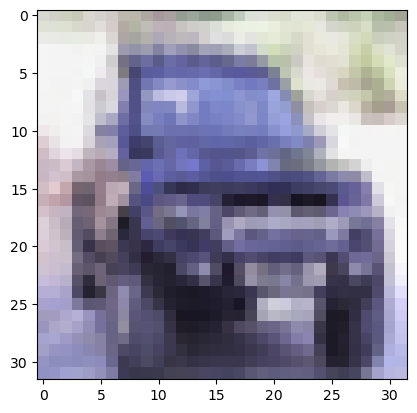

In [5]:
data1 = set1.data
data2 = set2.data
images = np.append(data1,data2, axis=0)

targets1 = set1.targets
targets2 = set2.targets
labels = targets1 + targets2

#print(len(targets1 + targets2))
#print(set1.__dict__)
#print((set1[2][0]).shape)

import matplotlib.pyplot as plt

index = 9
img = images[index + 50000]
print(img.shape)
print(set2[index][0].shape)
#permuted_img = (img.transpose((1, 2, 0)))
plt.imshow(img)
print(labels[index+50000])
print(data2.shape)

In [6]:
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
image_processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch32")
image_processor = AutoProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [51]:
slice_size = 1000

images_transposed = np.transpose(data2, (0,3,1,2))
print(images_transposed.shape)
images_slice = images_transposed[0:slice_size][:][:][:]
print(images_slice.shape)
inputs = image_processor(images=images_slice, return_tensors="pt")

(10000, 3, 32, 32)
(1000, 3, 32, 32)


In [52]:
image_embeddings = model.get_image_features(**inputs)

In [53]:
print(targets2)
print(type(image_embeddings))

[3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9, 5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9, 7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6, 8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6, 6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7, 8, 3, 1, 2, 8, 0, 8, 3, 5, 2, 4, 1, 8, 9, 1, 2, 9, 7, 2, 9, 6, 5, 6, 3, 8, 7, 6, 2, 5, 2, 8, 9, 6, 0, 0, 5, 2, 9, 5, 4, 2, 1, 6, 6, 8, 4, 8, 4, 5, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2, 3, 8, 6, 3, 4, 0, 5, 8, 0, 1, 7, 2, 8, 8, 7, 8, 5, 1, 8, 7, 1, 3, 0, 5, 7, 9, 7, 4, 5, 9, 8, 0, 7, 9, 8, 2, 7, 6, 9, 4, 3, 9, 6, 4, 7, 6, 5, 1, 5, 8, 8, 0, 4, 0, 5, 5, 1, 1, 8, 9, 0, 3, 1, 9, 2, 2, 5, 3, 9, 9, 4, 0, 3, 0, 0, 9, 8, 1, 5, 7, 0, 8, 2, 4, 7, 0, 2, 3, 6, 3, 8, 5, 0, 3, 4, 3, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 9, 3, 4, 6, 0, 0, 6, 6, 6, 3, 2, 6, 1, 8, 2, 1, 6, 8, 6, 8, 0, 4, 0, 7, 7, 5, 5, 3, 5, 2, 3, 4, 1, 7, 5, 4, 6, 1, 9, 3, 

In [54]:
pca = PCA(n_components=50)

In [55]:
embedding_1 = image_embeddings[4]
embedding_2 = image_embeddings[5]

print(embedding_1.shape)
cosine_similarity_torch(embedding_1, embedding_2)
#cosine_similarity(pca1, pca2)

torch.Size([512])


tensor(0.8190, grad_fn=<DivBackward0>)

In [56]:
pca = PCA(n_components=50)

pca_result = pca.fit_transform(image_embeddings.detach())

pca1 = pca_result[1]
pca2 = pca_result[2]

print(cosine_similarity_np(pca1, pca2))

0.6286362364495295


In [57]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(pca_result)

print(tsne_results.shape)

(1000, 2)


In [58]:
column_vals = ['x1', 'x2']

df = pd.DataFrame(data = tsne_results, columns=column_vals)

targets_slice = targets2[0:slice_size]

label_list =  ['airplane', 'automobile',
                'bird',
                'cat',
                'deer',
                'dog',
                'frog',
                'horse',
                'ship',
                'truck']

image_labels = [label_list[x] for x in targets_slice]

print(len(label_list))
#for x in targets_slice:
    #print(x)

df['label'] = image_labels

10


In [59]:
print(df)

            x1         x2       label
0     4.175907  -2.154634         cat
1   -30.354965 -22.003086        ship
2   -26.815166 -14.220782        ship
3    -8.343699  -7.851485    airplane
4    16.681099   4.461956        frog
..         ...        ...         ...
995  20.863298 -13.379931         cat
996 -24.533085 -26.157740        ship
997 -46.128769   3.136836  automobile
998  23.306929 -16.550793         cat
999 -26.273058 -21.669861        ship

[1000 rows x 3 columns]


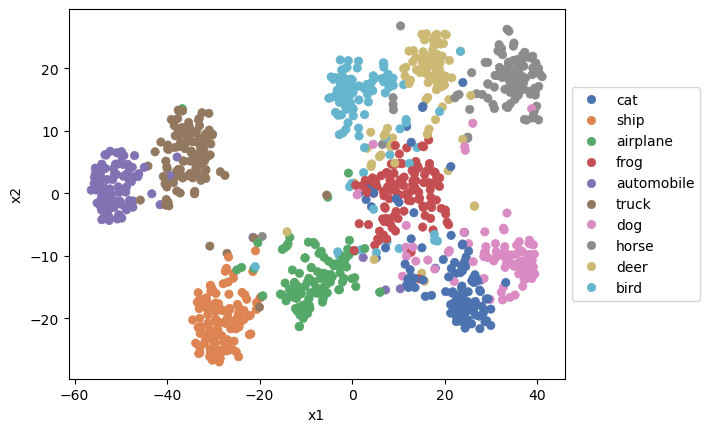

In [60]:
plot = sns.scatterplot(x='x1', y='x2', data=df, hue='label', ec=None, palette="deep")

plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

In [ ]:
images_slice = images_transposed[0:slice_size][:][:][:]
images_slice_unraveled